# Project 2

In [81]:
import pandas as pd
import seaborn as sns

### CO2 from 800kyrs to present

In [91]:
co2df=pd.read_csv('correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,2,])


In [92]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04
...,...,...,...
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69


In [93]:
co2df.dtypes

Gasage (yr BP)           float64
CO2 (ppmv)               float64
sigma mean CO2 (ppmv)    float64
dtype: object

In [94]:
co2df['year'] = co2df['Gasage (yr BP)'].apply(lambda x: -x)

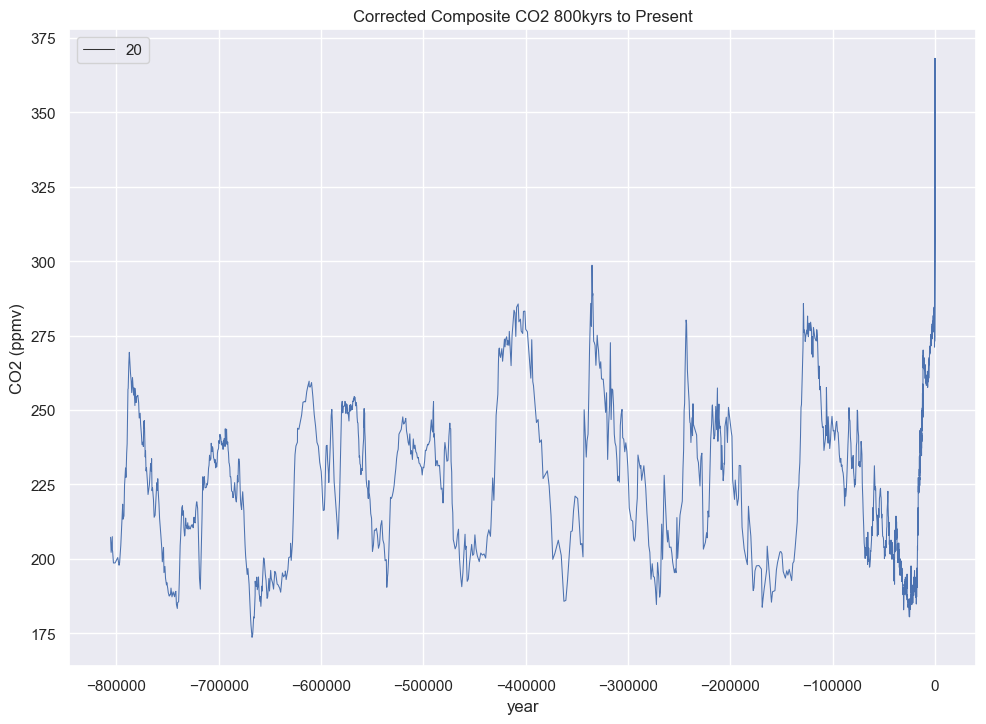

In [104]:
sns.lineplot(data=co2df, x='year', y='CO2 (ppmv)',size=20).set(title='Corrected Composite CO2 800kyrs to Present')
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Irish Data

In [ ]:
df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [ ]:
df

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + 
                                        df['Month'].astype(str), format='%Y%m')

In [ ]:
df

,Year,Month,Median montly series,Date
0,1711,1,16.4,1711-01-01
1,1711,2,73.1,1711-02-01
2,1711,3,121.2,1711-03-01
3,1711,4,85.2,1711-04-01
4,1711,5,66.6,1711-05-01
...,...,...,...,...
3667,2016,8,79.1,2016-08-01
3668,2016,9,108.1,2016-09-01
3669,2016,10,51.8,2016-10-01
3670,2016,11,58.0,2016-11-01


In [ ]:
sns.lineplot(data=df, x='Date', y='Median montly series', )

NameError: name 'df' is not defined

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].